# Исследование игр

В нашем распоряжении исторические данные о продажах компьютерных игр по всему миру, оценки пользователей и экспертов, жанры, платформы. Данные покрывают период до 2016 года. Необходимо спланировать маркетинговую кампанию на 2017 год на основе данных за прошлые периоды с возможностью переиспользования в следующих периодах. 

**Цель исследования**

Для планирования маркетинговой кампании нужно выявить закономерности, определяющие успешность игры.

**Ход исследования**

О качестве данных ничего не известно. Проверим данные на ошибки, аномалии, наличие дублей, пропусков и оценим их влияние на исследование. Затем на этапе предобработки исправим самые критичные ошибки данных, если это возможно.

Таким образом, исследование пройдёт в три этапа:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных, выявлений зависимостей и корреляций.
- Формулирование и проверка гипотез

# Изучение общей информации

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from textwrap import dedent
from IPython import get_ipython
from scipy import stats as st
import seaborn as sns

In [2]:
if os.path.exists('/datasets/games.csv'):
    data = pd.read_csv('/datasets/games.csv')
else:
    data = pd.read_csv('games.csv')

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведем общую информацию по таблице.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Построим гистограммы по каждому столбцу.

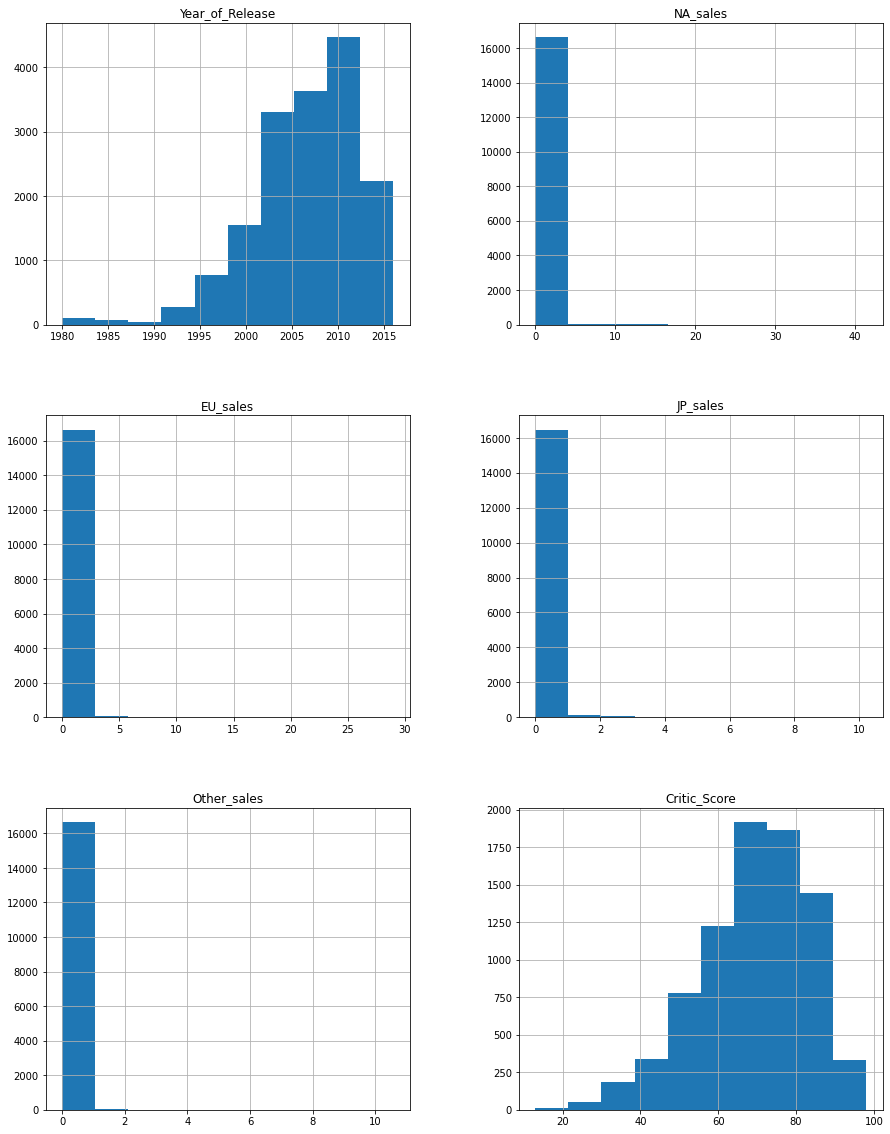

In [4]:
data.hist(figsize=(15, 20));

<div>
В датасете данные представлены с 1980 по 2016 год. В колонках с оценками пользователей, критиков и рейтингом ESRB есть много пропущенных значений. Также есть немного пропусков в столбцах с именем игры и годом выпуска.
<div>Оценка критиков - по 100-бальной шкале. </div>
<div>Оценка пользователей содержит строки, хотя по первым и последним строкам можно предположить, что оценка 10-бальная, возможно есть некорректные значения. </div>
<div>Судя по гистограммам, больше всего продаж в регионе Северная Америка, затем идет Европа, Япония и остальной мир.</div>

# Предобработка данных

## Обработка пропусков, обработка дублей и изменение типов данных

Переименуем колонки.

In [5]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', \
                            'Year_of_Release': 'year_of_release', \
                            'Genre': 'genre', 'NA_sales': 'na_sales', \
                            'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', \
                            'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', \
                            'User_Score': 'user_score', 'Rating': 'rating'}) 

Проверим данные на дубли.

In [6]:
data.duplicated().sum()

0

Явных дублей нет. Проверим, нет ли неявных дублей в колонках с жанрами и платформами.

In [7]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявных дублей также нет.

Выведем количество пропущенных значений для каждого столбца.

In [10]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Присутствуют пропуски в значимых для дальнейшего исследованиях столбцах: название игры, год выпуска.

In [11]:
print(100 - data['year_of_release'].count() / data['year_of_release'].shape[0] * 100)

1.6093329344899843


Количество пропусков очень незначительное, поэтому удалим эти строки.

In [12]:
data = data.dropna(subset=['year_of_release', 'name']).reset_index()

<div> Много пропусков в столбцах с оценками критиков и пользователей, а также в столбце с рейтингом. Удалить строки с пропусками нельзя, поскольку строки с незаполненными оценками представляют существенную долю данных.</div>
<div>Пропуски в этих столбцах могли возникнуть из-за особенностей сбора информации по оценкам и рейтингу. Рейтинг ESRB - это рейтинг игр, действующий в Канаде и США, для других регионов существуют свои рейтинговые организации. Поэтому если игра не продавалась в этом регионе, она может и не иметь рейтинга ESRB. </div>
<div>По каким-то играм вполне может не быть оценки пользователей. Поскольку главным критерием успешности игры являются продажи, то пока не будем заполнять эти столбцы.</div>
<div>К тому же в столбце с оценкой пользователей тип данных не соответствует числовому, возможно из-за того, что в нем присутствуют строки.</div>

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно в некоторых строках присутствует значение tbd, что означает оценка нуждается в уточнении ('to be determined'). Заменим такие значение на Nan. Также приведем тип столбца к вещественному.

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

data['user_score'] = data['user_score'].astype('float')

Колонка с годом релиза, напротив, не должна быть заполнена вещественными числами.

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

Заменим пустые значения в рейтинге на аббревиатуру 'tbd'.

In [16]:
data['rating'] = data['rating'].fillna('tbd')

Выведем статистическое описание данных для столбцов для поиска аномальных значений.

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,16444.0,8350.361226,4826.183870,0.0,4166.75,8354.50,12528.25,16714.00
year_of_release,16444.0,2006.486256,5.875525,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16444.0,0.264012,0.818378,0.0,0.00,0.08,0.24,41.36
eu_sales,16444.0,0.145930,0.506716,0.0,0.00,0.02,0.11,28.96
jp_sales,16444.0,0.078487,0.311100,0.0,0.00,0.00,0.04,10.22
other_sales,16444.0,0.047594,0.188005,0.0,0.00,0.01,0.03,10.57
critic_score,7983.0,68.994363,13.920060,13.0,60.00,71.00,79.00,98.00
user_score,7463.0,7.126330,1.499447,0.0,6.40,7.50,8.20,9.70


Значения находятся в адекватных пределах.

**Выводы**
<div>
В датасете данные представлены с 1980 по 2016 год. В колонках с оценками пользователей, критиков и рейтингом ESRB есть много пропущенных значений (40-50%), причиной тому может быть:</div>
<div>1) ошибка сбора данных</div>
<div>2) отсутствие оценки критиков и пользователей для непопулярной игры</div>
<div>3) применительно к рейтингу - игра не проходила оценку организацией ESRB.</div>
<div>Пользовательская оценка 10-ти бальнная. Оценка критиков - по 100-бальной шкале. </div>
<div>Судя по гистограммам, больше всего продаж в регионе Северная Америка, затем идет Европа, Япония и остальной мир.</div>

# Анализ данных и составление портрета пользователя

Добавим новый столбец по общим продажам

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Анализ продаж игр по периодам, платформам и жанрам

Посмотрим, сколько игр выпускалось в разные годы.

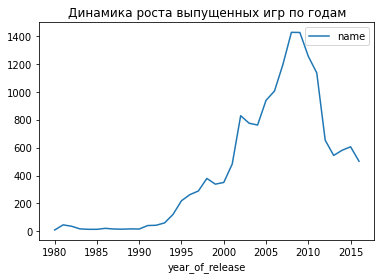

In [19]:
pt = pd.pivot_table(data, index='year_of_release',
                   values='name',
                   aggfunc='count')
pt.plot(title='Динамика роста выпущенных игр по годам');

Видно, что количество игр начало рост в 1990-е и индустрия переживала бурный рост в 2000-е. Затем количество игр начало снижаться, в 2012 количество игр упало в 2 раза по срвнению с 2011. В 2015 наметился рост. При этом видно, что в 2016 г. наблюдается спад по сравнению с 2015, что может говорить о том, что данные за 2016 неполные. Сами консоли и игры к ним принято дарить на праздники. Учитывая, что данные получены в декабре 2016, они могут не отражать традиционный подъем продаж к рождеству и новому году. 
В анализе лучше учитывать данные за три года: 2014 г., 2015 г. и 2016 г., т.к. в 2016 могли наметиться новые тренды.

In [20]:
pt = pd.pivot_table(data, index=['platform'],
                   values='total_sales',
                   aggfunc='sum').reset_index()
pt = pt.sort_values(by='total_sales', ascending=False)
pt.head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Лидеры по продажам: PS2, X360, PS3, Wii и DS. Построим по ним распределение продаж по годам.

In [21]:
list_topsales = pt.head(10)['platform'].tolist()
data_topsales = data.query('platform in @list_topsales')
pt_topsales_years = pd.pivot_table(data_topsales, index=['year_of_release'],
                   columns='platform',
                   values='total_sales',
                   aggfunc='sum')
pt_topsales_years

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year_of_release'>

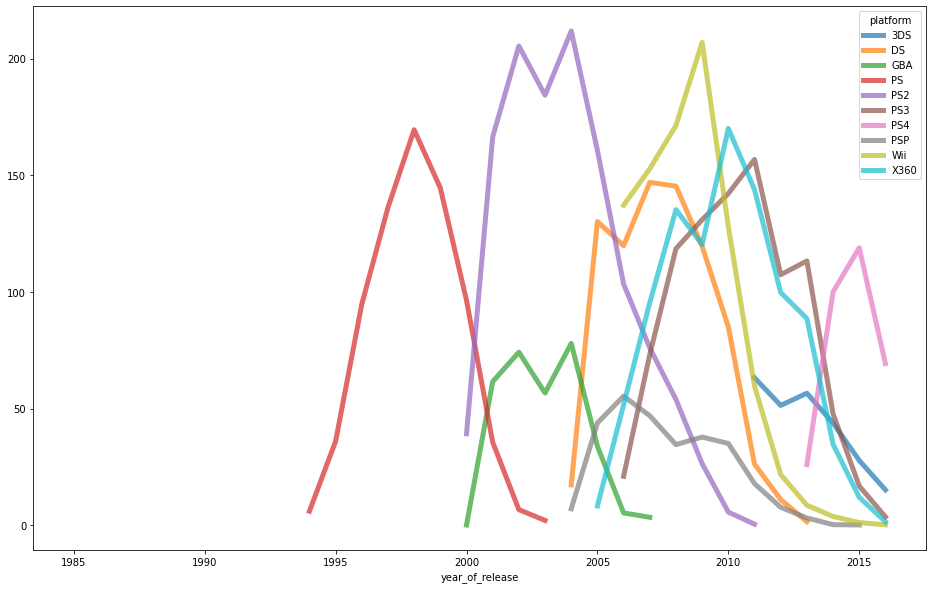

In [22]:
pt_topsales_years.plot(alpha=0.7, linewidth=5, figsize=(16, 10))

Средний срок жизни платформы около 10 лет: как правило, это год выпуска (неполный) и 5-6 лет активных продаж до спада, чаще всего до выпуска новых консолей.

Для исследования возьмем 2014-2016 год. Есть основания полагать, что данные за 2016 не являются полными, но при этом с 2015 уже наметилась тенденция к увеличению количества выпускаемых игр. Данные за 2014 нужны для определения тенденции к снижению или росту продаж на платформе. 

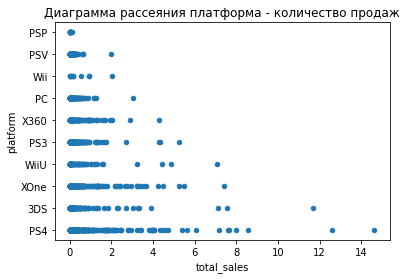

In [23]:
data_prev = data.query('year_of_release in [2014, 2015, 2016]')
data_prev.plot(x='total_sales', y='platform', kind='scatter', title='Диаграмма рассеяния платформа - количество продаж');

Судя по диаграмме рассеяния большинство продаж за эти годы приходилось на PS4, 3DS, XOne и WiiU. Посмотрим на динамику продаж. 

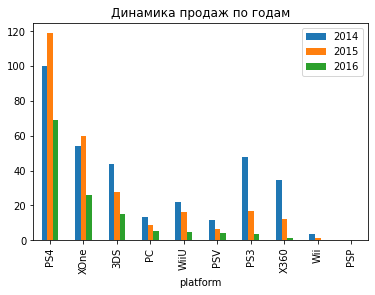

In [24]:
pt_prev = pd.pivot_table(data_prev, index=['platform'],
                   columns='year_of_release',
                   values='total_sales',
                   aggfunc='sum')
pt_prev.columns = ['2014', '2015', '2016']

pt_prev = pt_prev.sort_values(by='2016', ascending=False)
pt_prev.plot(kind='bar', title = 'Динамика продаж по годам');

Из графика видно, что продажи PS4 и XOne в 2015 росли, а вот продажи 3DS и WiiU упали в 2015 г. относительно 2014. Да и в целом, все платформы, кроме двух лидирующих, показали спад относительно 2014. По неполным данным 2016 все платформы отстают от показателей 2015.
Таким образом, PS4 и XOne выглядят наиболее привлекательными, но также нельзя скидывать со счетов консоли Nintendo: 3DS и WiiU, - в японском сегменте рынка.

Построим ящик с усами для выбранных платформ, это поможет увидеть аномалии в данных и убедиться в их корректности.

* Ящик с усами для продаж игр по платформе "PS4"

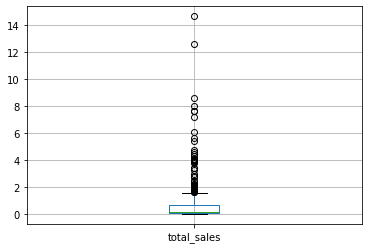

In [25]:
data_prev.query('platform == "PS4"').boxplot(column='total_sales');

На графике много выбросов, ключевая информация по распределению не видна. Построим график без выбросов.

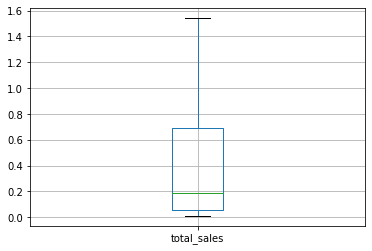

In [26]:
data_prev.query('platform == "PS4"').boxplot(column='total_sales', showfliers=False);

In [27]:
data_prev.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

Медиана равна 290 тыс. копий, судя по графику продажи не должны превышать 2,2-2,3 млн.копий. Отсортируем игры по количеству проданных копий.

In [28]:
pd.pivot_table(data_prev.query('platform == "PS4"'), index=['name', 'platform'],
                   values='total_sales',
                   aggfunc='sum').sort_values(by='total_sales', ascending=False)

,,total_sales
name,platform,
Call of Duty: Black Ops 3,PS4,14.63
Grand Theft Auto V,PS4,12.62
FIFA 16,PS4,8.58
Star Wars Battlefront (2015),PS4,7.98
Call of Duty: Advanced Warfare,PS4,7.66
...,...,...
Rocksmith 2014 Edition Remastered,PS4,0.01
Root Letter,PS4,0.01
Crows: Burning Edge,PS4,0.01


**Вывод**
  - Обнаруженные аномалии: по графику очевидно, что распределение данных имеет аномалии. Минимальное значение продаж 10 тыс копий, максимальное 14 млн копий, медиана 290 тыс.
  - Причины, по которым они могли возникнуть: на эту консоль выпускалось очень много разных игр, какие-то были не популярны, а другие наоборот были очень успешными. Таблица игр, отсортированная по убыванию продаж, это доказывает.

* Ящик с усами для продаж игр по платформе "XOne"

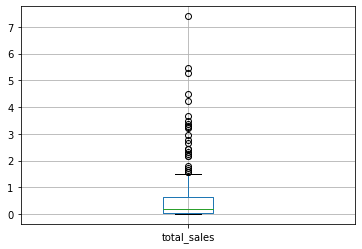

In [29]:
data_prev.query('platform == "XOne"').boxplot(column='total_sales');

На XOne похожая картина. Построим график без выбросов и выведем статистику.

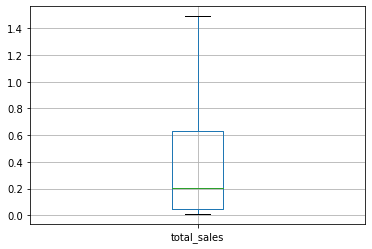

In [30]:
data_prev.query('platform == "XOne"').boxplot(column='total_sales', showfliers=False);

(0.0, 0.8)

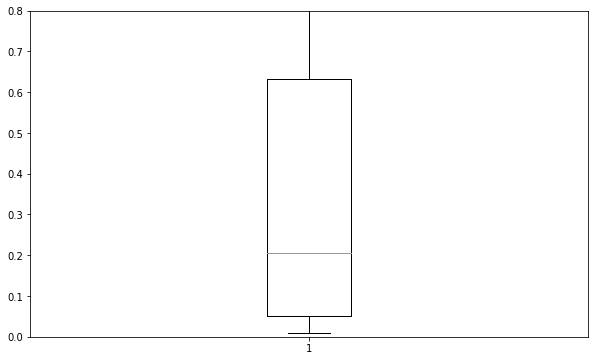

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.boxplot(data_prev.query('platform == "XOne"')['total_sales'], notch=0, sym='+', vert=1, whis=1.5)
ax1.set_ylim(0, 0.8)
#.boxplot(column='total_sales', ylim=(0, 0.8));

In [ ]:
data_prev.query('platform == "XOne"')['total_sales'].describe()

Проверим также 3DS и WiiU.

* Ящик с усами для продаж игр по платформе "3DS"

In [ ]:
data_prev.query('platform == "3DS"').boxplot(column='total_sales');

И на 3DS тоже. Построим график без выбросов и выведем статистику.

In [ ]:
data_prev.query('platform == "3DS"').boxplot(column='total_sales', showfliers=False);

In [ ]:
data_prev.query('platform == "3DS"')['total_sales'].describe()

* Ящик с усами для продаж игр по платформе "WiiU"

In [ ]:
data_prev.query('platform == "WiiU"').boxplot(column='total_sales');

In [ ]:
data_prev.query('platform == "WiiU"').boxplot(column='total_sales', showfliers=False);

In [ ]:
data_prev.query('platform == "WiiU"')['total_sales'].describe()

По WiiU аномальных значений меньше. Чем менее популярна платформа в выбранный период времени, тем меньше разброс значений.

<div><b>Вывод</b></div>
<div>Видно, что с 1993 по 2009 годы количество игр год от года росло. В 2000-е технологии активно развивались и с ними вместе развивалась индустрия игр. Рынок наполнялся новыми студиями, количество привлекаемых денежных средств в индустрию тоже увеличивалось. Качество игр росло, а следом и бюджет на разработку, как и трудоемкость создания. Со временем покупатели стали охотнее покупать крупнобюджетные игры, поскольку цена на них не сильно отличалась от цены среднебюджетной игры, а качество графики было намного выше. Это изменило тренд на создание дорогих качественных игр, цикл производства которых более длителен, чем разработка среднебюджетной игры (так называемая гонка бюджетов). К тому же студии-разработчики среднебюджетных игр стали неконкурентноспособными - они не могли выдать сопоставимое качество в среднем бюджете. Это привело к спаду общего количества продаваемых игр. Далее рост производительности железа замедлился. В последние годы из-за проблем с полупроводниками не все пользователи игр могут обновить свое оборудование (купить продвинутую видеокарту или новую консоль), т.к. это стало дороже. Также снизилось количество новых франшиз в сегменте крупнобюджетных игр: удачную франшизу развивают до тех пор пока она приносит прибыль. Пользователи стали уставать от крупных франшиз, некоторые франшизы потеряли свою первоначальную атмосферу. Это привело к тому, что стал возрождаться тренд на среднебюджетные игры, к тому же качество ПО для разработки улучшилось, что позволило за средние бюджеты создавать игры на хорошем уровне качества.</div>
При этом видно, что в 2016 г. наблюдается спад по сравнению с 2015, что может говорить о том, что данные за 2016 неполные.
<div>В рассматриваемый период 2014-2015 гг. лидерами продаж являются PS4, XOne и японская Wiiu, 3DS.</div>

## Выявление факторов, влияющих на продажи

### Оценки пользователей и критиков

Посмотрим на примере PS4, зависит ли количество продаж от оценки пользователей.

In [ ]:
data_ps4 = data_prev.query('platform == "PS4"')
data_ps4.plot(x='total_sales', y='user_score', kind='scatter', title='Диаграмма рассеяния для PS4 оценка пользователей - продажи');
print(data_ps4['total_sales'].corr(data['user_score']))

Корреляции между оценками пользователей и продажами нет. У игр, проданных более чем 4 миллионами копий, чаще оценка выше 5. При этом есть много игр, оцененных высоко, но продажи их намного меньше 4 млн.

In [ ]:
data_ps4.plot(x='total_sales', y='critic_score', kind='scatter', title='Диаграмма рассеяния оценка критиков - продажи');
print(data_ps4['total_sales'].corr(data['critic_score']))

Корреляция между оценкой критиков и продажами есть, но слабая. Низких оценок в принципе мало и продажи по таким играм маленькие.

Проверим, сколько незаполненных строк по оценкам в датафрейме и посмотрим первую десятку игр по продажам.

In [ ]:
pd.DataFrame(round(data_ps4.isna().mean()*100,)).style.background_gradient('coolwarm')

In [ ]:
data_ps4.sort_values(by='total_sales', ascending=False).head(10)

**Вывод:** игры, выпущенные под платформу PS4, в большей своей части имеют хорошие оценки как пользователей, так и критиков. Наблюдается слабая корреляция между оценками критиков и продажами. Также следует помнить, что далеко не для всех игр оценки есть. Например, для PS4 для 33-35% строк оценки не проставлены. Есть незаполненные значения даже для весьма успешных игр: Call of Duty: Black Ops 3, Star Wars Battlefront (2015).

Проверим, что выводы корректны и для других платформ. Сделаем это на примере XOne и в целом по всем продажам за выбранный период.

In [ ]:
data_xone = data_prev.query('platform == "XOne"')
data_xone.plot(x='total_sales', y='user_score', kind='scatter', title='Диаграмма рассеяния XOne оценка пользователей - продажи');
print(data_xone['total_sales'].corr(data['user_score']))

Корреляции между оценками пользователей и продажами также нет.

In [ ]:
data_xone.plot(x='total_sales', y='critic_score', kind='scatter', title='Диаграмма рассеяния XOne оценка критиков - продажи');
print(data_xone['total_sales'].corr(data['critic_score']))

Слабая корреляция между оценками критиков и продажами наблюдается.

In [ ]:
data_prev.plot(x='total_sales', y='user_score', kind='scatter', title='Диаграмма рассеяния оценка пользователей - продажи');
print(data_prev['total_sales'].corr(data['user_score']))

По всем платформам суммарно такая же картина.

In [ ]:
data_prev.plot(x='total_sales', y='critic_score', kind='scatter', title='Диаграмма рассеяния оценка критиков - продажи');
print(data_prev['total_sales'].corr(data['critic_score']))

Корреляция также слабая, даже слабее чем для лидеров продаж.

**Вывод:** оценка пользователей не связана с количеством продаж. Частично это может быть связано с возрождением тренда на среднебюдежтные игры - это не крупные франшизы, массовость их ниже, продажи как следствие тоже, но в своем жанре/сегменте пользователи могут оценивать их весьма высоко. Оценка критиков в данном случае более показательна, хотя и только на нее тоже полагаться нельзя. В последнее время общая оценка игры уходит в прошлое, т.к. оценивается множество показателей: графика, сюжет, динамика, соответствие жанру, геймплей etc.

### Жанры

Проанализируем, есть ли популярные и непопулярные жанры.

In [ ]:
pt_genre = pd.pivot_table(data_prev, index=['genre'],
                          values=['total_sales'],
                          aggfunc=['sum', 'median']).sort_values(by=('median', 'total_sales'), ascending=False)
pt_genre

**Вывод:** самый высокий показатель медианных продаж у шутеров и спортивных игр, причем разница медиан по шутерам и спортивным играм весьма существенная. Самый низкий показатель медианной продажи у пазлов и Adventure. 

## Анализ продаж по регионам

### Анализ платформ по регионам

Проведем анализ по регионам. Сперва проанализируем топ-5 популярных платформ по каждому региону.

In [ ]:
pt_regions = pd.pivot_table(data_prev, index=['platform'],
                          values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                          aggfunc=['sum']).reset_index()
pt_regions.columns=['platform', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']

In [ ]:
pt_regions.sort_values(by='eu_sales', ascending=False).plot(x='platform', y='eu_sales', kind='bar',
                                                           title = 'График продаж по платформам в Европе');

В Европе с большим отрывом лидируют продажи игр на платформе PS4.Следом идет XOne и предыдущее поколение лидеров: PS3, X360. Замыкает топ-5 игры на компьютер - PC.

In [ ]:
pt_regions.sort_values(by='jp_sales', ascending=False).plot(x='platform', y='jp_sales', kind='bar',
                                                           title = 'График продаж по платформам в Японии');

В Японии с большим отрывом лидируют продажи игр на платформе 3DS. 3DS - это платформа бренда Nintendo, одной из первых игровых компаний. Японский рынок игр отличается от Европейского и рынка Канада и США: и платформами, и самими играми. В топ-5 также входит WiiU - другая консоль от Nintendo. На 2-4 месте с почти одинаковыми показателями располагаются консоли от Sony: PSV (портативная PS), PS3, PS4. Sony исторически японская компания, поэтому имеет определенную долю рынка, но все же в значительно степени ее продукты ориентированы на западного пользователя, поэтому платформы от Nintendo лидируют.

In [ ]:
pt_regions.sort_values(by='na_sales', ascending=False).plot(x='platform', y='na_sales', kind='bar',
                                                           title = 'График продаж по платформам в США и Канаде');

В США и Канаде лидирует с небольшим отрывом PS4, за ней идет XOne. Далее с большим отрывом идет старое поколение консолей:
X360 и PS3, а за ними на 5-ом месте 3DS. Продажи игр на WiiU незначительно ниже 3DS.

In [ ]:
pt_regions.sort_values(by='other_sales', ascending=False).plot(x='platform', y='other_sales', kind='bar',
                                                           title = 'График продаж по платформам в остальных странах мира');

В остальных странах также как и в Европе и Северной Америке с большим отрывом лидирует PS4. Далее идут XOne, PS3, X360 и 3DS. Что интересно новая консоль XOne незначительно опережает PS3. Платформы Sony более популярны, чем Microsoft.

<b>Вывод</b>
<div>Практически во всех регионах лидирует PS4: в Европе и остальном мире с большим отрывом, в Северной Америка отрыв от XOne не такой значительный. На японском рынке ситуация совсем другая, т.к. превалируют платформа от Nintendo - эту локальную особенность надо учитывать. Платформы от Microsoft тут непопулярны совсем. Далее в топе для Японии идут платформы от sony и опять же платформа от Nintendo - WiiU.</div>
<div>Для регионов Европа, Северная Америка и остальной мир видно, что сохраняются продажи игр на старые поколения консолей PS3 и X360 и почти всегда в первую пятерку входят 3DS или WiiU. Для Европы также стоит отметить продажи игр на PC.</div>

### Анализ топ-5 по жанров по регионам

In [ ]:
pt_regions_genre = pd.pivot_table(data_prev, index=['genre'],
                          values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                          aggfunc=['sum']).reset_index()
pt_regions_genre.columns=['genre', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']

In [ ]:
pt_regions_genre.sort_values(by='eu_sales', ascending=False).plot(x='genre', y='eu_sales', kind='bar',
                                                           title = 'График продаж по жанрам в Европе');

В Европе преобладают следующие жанры:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Racing.

In [ ]:
pt_regions_genre.sort_values(by='na_sales', ascending=False).plot(x='genre', y='na_sales', kind='bar',
                                                           title = 'График продаж по жанрам в Канаде и США');

В Северной Америке преобладают следующие жанры:
- Action,
- Shooter,
- Sports,
- Role-Playing,
- Misc.
<div> Причем action и шутеры примерно на одном уровне. </div>

In [ ]:
pt_regions_genre.sort_values(by='jp_sales', ascending=False).plot(x='genre', y='jp_sales', kind='bar',
                                                           title = 'График продаж по жанрам в Японии');

В Японии преобладают следующие жанры:
- Role-Playing,
- Action,
- с заметным отрывом идут файтинги, аркады (misc) и шутеры.

In [ ]:
pt_regions_genre.sort_values(by='other_sales', ascending=False).plot(x='genre', y='other_sales', kind='bar',
                                                           title = 'График продаж по жанрам в других странах');

В остальном мире топ-5 жанров такой же как в Северной Америке.

<b>Вывод</b>
<div>Япония и в этом рейтинге показала свои особенности. Если для рынка Европы, Северной Америки и остального мира характерны в топах жанры action, шутеры, спортивные игры, а уже на четверотом месте ролевые игры и аркады, то в Японии очень популряны именно ролевки, с ними почти наравне идут action игры.</div>
<div>В целом, наиболее популярны игры в жанре action - они занимают первое место во всех регионах, кроме Японии, но и в Японии у них почетное второе место.</div>

### Рейтинг ESRB

Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. 
Значения рейтинга:
<div><b>«EC» («Early childhood») — «Для детей младшего возраста»:</b> Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».</div>
<div><b>«E» («Everyone») — «Для всех»:</b> Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.</div>
<div><b>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»:</b> Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.</div>
<div><b>«T» («Teen») — «Подросткам»:</b> Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.</div>
<div><b>«M» («Mature») — «Для взрослых»:</b> Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.</div>
<div><b>«AO» («Adults Only 18+») — «Только для взрослых»:</b> Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.</div>
<div><b>«RP» («Rating Pending») — «Рейтинг ожидается»:</b> Продукт был отправлен в ESRB и ожидает присвоения рейтинга.</div>
<div><b>«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»:</b> Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M».</div> 

In [ ]:
pt_regions_esrb = pd.pivot_table(data_prev, index=['rating'],
                          values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                          aggfunc=['sum']).reset_index()
pt_regions_esrb.columns=['rating', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']

In [ ]:
fig, ax = plt.subplots()
ax.set_title('График продаж в зависимости от рейтинга в Северной Америке')
ax.pie(pt_regions_esrb['na_sales'], labels=pt_regions_esrb['rating'],autopct='%1.1f%%');

Большую долю продаж составляют игры с рейтингом "для взрослых" - 34%. Почти в два раза меньше игр с рейтингом "для всех" и по 14% и 12% на игры для подростков и "для всех от 10 лет и старше". У пятой части игр рейтинга нет.

In [ ]:
fig, ax = plt.subplots()
ax.set_title('График продаж в зависимости от рейтинга в Европы')
ax.pie(pt_regions_esrb['eu_sales'], labels=pt_regions_esrb['rating'],autopct='%1.1f%%');

Похожая ситуация и в Европе: доля примерно такие же. Доля игр "для взрослых" и "для всех" чуть выше, чем в Северной Америке, доля игр для подростков и "для всех от 10 лет и старше" чуть меньше чем в NA. Также у пятой части игр нет рейтинга.

In [ ]:
fig, ax = plt.subplots()
ax.set_title('График продаж в зависимости от рейтинга в Японии')
ax.pie(pt_regions_esrb['jp_sales'], labels=pt_regions_esrb['rating'],autopct='%1.1f%%');

В Японии распределение более половины игр (около 60%) не имеет рейтинга. 16% рынка - это игры для подростков, доля игр для взрослых и для всех 9% и 10% оответственно, доля игр "для всех от 10 лет и старше" меньше в два раза - около 5%.

In [ ]:
fig, ax = plt.subplots()
ax.set_title('График продаж в зависимости от рейтинга в других странах')
ax.pie(pt_regions_esrb['other_sales'], labels=pt_regions_esrb['rating'],autopct='%1.1f%%');

Распределение по рейтингам для остального мира похоже на распределение долей в Европе.

<b>Вывод</b>
<div>
    Анализ долей по рейтингам показал, что в Европе, Северной Америке и остальном мире распределение примерно одинаковое. Примерно пятая часть игр идет без рейтинга, большая часть продаж приходится на игры для взрослых - 35% , 12-14% приходится на игры для подростков. Игры с рейтингом E занимают примерно пятую часть рынка, игры с рейтингом E10 также занимают от 10 до 12%.
    В Японии около 60% проданных игр без рейтинга ESRB. Доля игр для подростков выше, чем доля игр для взрослых - 16% и 9% соответственно. На рейтинги E и E10 приходится соответственно 10% и 5%. </div>
    
<div>Следует учитывать, что для японского рынка выпускается много локальных игр, которые в принципе не интересны пользователям остального мира. К тому же есть отдельные рейтинговые агенства Европы и Японии.</div>

# Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Пользовательский рейтинг (user_score) платформы "Xbox One" = пользовательский рейтинг (user_score) платформы "PC"`
H_a: Пользовательский рейтинг (user_score) платформы "Xbox One" ≠ пользовательский рейтинг (user_score) платформы "PC"`
alpha = 0.05
```

In [ ]:
user_score_xone = data[data['platform'] =='XOne']['user_score']
user_score_pc = data[data['platform'] =='PC']['user_score']
results = st.ttest_ind(user_score_xone.dropna(),
                       user_score_pc.dropna(),
                       equal_var=False) # выборки не равны по размеру

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

**Вывод:** вероятность того, что пользовательские рейтинги платформ Xbox One и PC одинаковые слишком мала.

Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Пользовательский рейтинг (user_score) жанра "Action" = пользовательский рейтинг (user_score) жанра "Sports"`
H_a: Пользовательский рейтинг (user_score) жанра "Action" ≠ пользовательский рейтинг (user_score) жанра "Sports"`
alpha = 0.05
```

In [ ]:
user_score_action = data[data['genre'] =='Action']['user_score']
user_score_sports = data[data['genre'] =='Sports']['user_score']
results = st.ttest_ind(user_score_action.dropna(),
                       user_score_sports.dropna(),
                       equal_var=False) # выборки не равны по размеру

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

**Вывод:** есть вероятность 7% того, что пользовательские рейтинги жанров Action и Sports равны.

# Общий вывод


Были проанализированы исторические данные о продажах компьютерных игр по всему миру.
    
Данные покрывают период с 1980 до 2016 года. По каждой игре доступны данные о продажах в разрезе регионов, информация о жанре, платформе, а также пользовательская оценка, оценка критиков и рейтинг ESRB. Данные по оценкам и рейтингу заполнены примерно у 50% датасета. Дублей нет.

Больше всего продаж в регионе Северная Америка, затем идет Европа, Япония и остальной мир.

Для планирования маркетинговой кампании на 2017г. был взят период 2014-2016 гг, учтены данные 2016 года, хоть они и неполные. Использовалось три года для оценки динамики роста или падения в разрезе различных факторов.
    
В рассматриваемый период лидерами продаж по платформам являются PS4, XOne и японские Wiiu, 3DS. Следует учитывать региональные особенности: в Северной Америке платформы Sony и Microsoft близки по распространенности (надо учитывать, что на этот регион приходится больше всего продаж игр в принципе). На японском рынке ситуация совсем другая, т.к. превалирует платформа от Nintendo, но также распространены и платформы от Sony. В Европе и остальном мире PS4 безусловный лидер.

По оценке пользователей прогнозировать продажи не корректно: корреляции между пользовательскими оценками и продажами нет. Среднебюджетные игры могут быть оценены высоко, но при этом не быть массовым продуктом.

Оценка критиков более информативна, хотя и только на нее тоже полагаться нельзя. В последнее время общая оценка игры уходит в прошлое, т.к. оценивается множество показателей: графика, сюжет, динамика, соответствие жанру, геймплей etc.

Самые высокие медианные продажи у шутеров и спортивных игр, в абсолютном выражении самыми прибыльными жанрами являются Action и Shooter, а вот стратегии, пазлы и приключенческие игры являются очень нишевым продуктом. При этом следует учитывать региональные предпочтения: в Японии покупатели отдают предпочтение играм в жанре Role-Playing. Также в топ-5 продаж по жанрам входят игры в жанрах Sports и Misc.

Анализ игр по рейтингу ESRB показал, что ~20% продаваемых игр рейтига не имеют, в Японии долля таких игр больше 60%. По играм, имеющим рейтинг, во всех регионах кроме Японии большая часть продаж приходится на игры для взрослых ~35%, 12-14% приходится на игры для подростков. В Японии наоборот 16% приходится на игры для подростков и всего 9% на игры для взрослых.